# 2.4 생성된 답변을 여러번 검증하는 Self-RAG

In [ ]:

embedding_function = 

collection_name = "chroma-income-tax-ollama_embedding"
vector_store = 

retriever = 

In [ ]:
query = "연봉 5천만원인 거주자가 납부해야 하는 소득세는 얼마인가요?"

response = 
response

In [ ]:


class AgentState(  ):
    
    

workflow = 

In [ ]:
def retrieve(  )  
    """
    사용자의 질문에 기반하여 벡터 스토어에서 관련 문서를 검색합니다.
    Args:
        state (AgentState): 사용자의 질문을 포함한 에이전트의 현재 state.
    Returns:
        AgentState: 검색된 문서가 추가된 state를 반환합니다.
    """
    print("retrieve")
    
    return

In [ ]:


llm_ollama = 

- [rlm/rag-prompt](https://smith.langchain.com/hub/rlm/rag-prompt)
- HUMAN
    - You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
    - Question: {question} 
    - Context: {context} 
- Answer:

In [ ]:


generate_prompt = 

generate_llm = 

def generate(  )  
    """
    주어진 state를 기반으로 RAG 체인을 사용하여 응답을 생성합니다.
    Args:
        state (AgentState): 사용자의 질문과 문맥을 포함한 에이전트의 현재 state.
    Returns:
        AgentState: 생성된 응답을 포함하는 state를 반환합니다.
    """
    print("generate")
    
    
    return

- [langchain-ai/rag-document-relevance](https://smith.langchain.com/hub/langchain-ai/rag-document-relevance)
- HUMAN
    - FACTS: {{documents}}
    - QUESTION: {{question}}
- Score:
    - A score of 1 means that the FACT contain ANY keywords or semantic meaning related to the QUESTION and are therefore relevant. This is the highest (best) score. 
    - A score of 0 means that the FACTS are completely unrelated to the QUESTION. This is the lowest possible score you can give.

In [ ]:


doc_relevance_prompt = 

def check_doc_relevance(  )  
    """
    주어진 state를 기반으로 문서의 관련성을 판단합니다.
    Args:
        state (AgentState): 사용자의 질문과 문맥을 포함한 에이전트의 현재 state.
    Returns:
        Literal['relevant', 'irrelevant']: 문서가 관련성이 높으면 'relevant', 그렇지 않으면 'irrelevant'를 반환합니다.
    """
    print("check_doc_relevance")
    
    
    if 
    
    return

In [ ]:

dictionary = 
template = 

rewrite_prompt = 

def rewrite(  )  
    """
    사용자의 질문을 사전을 참고하여 변경합니다.
    Args:
        state (AgentState): 사용자의 질문을 포함한 에이전트의 현재 state.
    Returns:
        AgentState: 변경된 질문을 포함하는 state를 반환합니다.
    """
    print("rewrite")
    
    return

- [langchain-ai/rag-answer-hallucination](https://smith.langchain.com/hub/langchain-ai/rag-answer-hallucination)
- HUMAN
    - FACTS: {{documents}} 
    - STUDENT ANSWER: {{student_answer}}
- Score:
    - A score of 1 means that the student's answer meets all of the criteria. This is the highest (best) score. 
    - A score of 0 means that the student's answer does not meet all of the criteria. This is the lowest possible score you can give.

In [ ]:

hallucination_prompt = 

hallucination_llm = 

def check_hallucination(  )  
    """
    사용자의 질문에 기반하여 생성된 답변의 할루시네이션 여부를 평가합니다.
    Args:
        state (AgentState): 사용자의 질문과 생성된 답변을 포함한 에이전트의 현재 state.
    Returns:
        str: 답변이 할루시네이션이라고 판단되면 'hallucinated', 그렇지 않으면 'non-hallucinated'을 반환합니다.
    """
    print("check_hallucination")
    
    
    if 
    
    return

In [ ]:
query = "연봉 5천만원인 거주자가 납부해야 하는 소득세는 얼마인가요?"

check_hallucination

- [langchain-ai/rag-answer-helpfulness](https://smith.langchain.com/hub/langchain-ai/rag-answer-helpfulness)
- HUMAN
    - STUDENT ANSWER: {{student_answer}}
    - QUESTION: {{question}}
- Score:
    - A score of 1 means that the student's answer meets all of the criteria. This is the highest (best) score. 
    - A score of 0 means that the student's answer does not meet all of the criteria. This is the lowest possible score you can give.

In [ ]:

helpfulness_prompt = 

def check_helpfulness_grader(  )  
    """
    사용자의 질문에 기반하여 생성된 답변의 유용성을 평가합니다.
    Args:
        state (AgentState): 사용자의 질문과 생성된 답변을 포함한 에이전트의 현재 state.
    Returns:
        str: 답변이 유용하다고 판단되면 'helpful', 그렇지 않으면 'unhelpful'을 반환합니다.
    """
    print("check_helpfulness_grader")
    
    
    if 
    
    return

def check_helpfulness(  )  
    """
    유용성을 확인하는 자리 표시자 함수입니다. 
    graph에서 conditional_edge를 연속으로 사용하지 않고 node를 추가해
    가독성을 높이기 위해 사용합니다
    Args:
        state (AgentState): 에이전트의 현재 state.
    Returns:
        AgentState: 변경되지 않은 state를 반환합니다.
    """
    print("check_helpfulness")
    return


In [ ]:

workflow.add_node


workflow.add_edge


workflow.add_conditional_edges


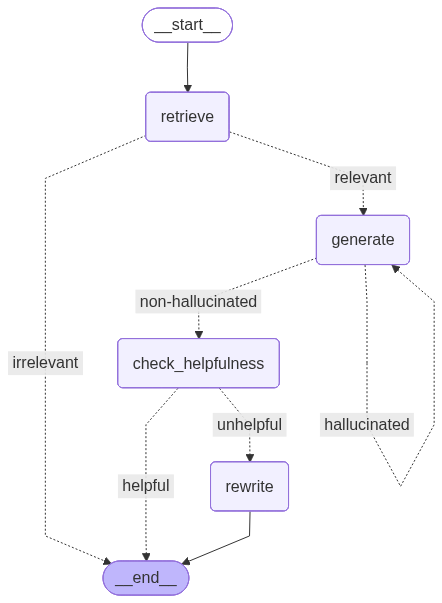

In [13]:
from IPython.display import display, Image

graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
query = "연봉 5천만원인 거주자가 납부해야 하는 소득세는 얼마인가요?"

response = 
response

In [ ]:
print(response["answer"].content)